<a href="https://colab.research.google.com/github/Surhan-Memon/Developers-internship-tasks/blob/main/Amazon_Products_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv('1429_1.csv')
print(customer_data.head(5))

                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

/tmp/ipython-input-2-216315887.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('1429_1.csv')


In [3]:
#description of columns:
columns = customer_data.columns
print(columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [4]:
#is there any missing values:
missing_values = customer_data.isnull().sum()
print(missing_values.sum())
print(missing_values.sort_values(ascending = False))

157230
reviews.userCity        34660
reviews.userProvince    34660
reviews.id              34659
reviews.didPurchase     34659
reviews.dateAdded       10621
name                     6760
reviews.doRecommend       594
reviews.numHelpful        529
reviews.date               39
reviews.rating             33
reviews.username            7
reviews.title               6
asins                       2
reviews.text                1
categories                  0
id                          0
brand                       0
reviews.dateSeen            0
keys                        0
manufacturer                0
reviews.sourceURLs          0
dtype: int64


In [5]:
# Drop irrelevant columns
customer_data.drop(['reviews.userCity', 'reviews.userProvince', 'reviews.id', 'reviews.didPurchase'],
                   axis=1, inplace=True, errors='ignore')

# Fill missing text values
customer_data['name'].fillna('Unknown', inplace=True)
customer_data['reviews.username'].fillna('Unknown', inplace=True)
customer_data['reviews.title'].fillna('Unknown', inplace=True)
customer_data['reviews.sourceURLs'].fillna('Unknown', inplace=True)
customer_data['reviews.text'].fillna('Unknown', inplace=True)
customer_data['reviews.dateAdded'].fillna('Unknown', inplace=True)
customer_data['reviews.dateSeen'].fillna('Unknown', inplace=True)
customer_data['reviews.doRecommend'].fillna('Unknown', inplace=True)  # or use True/False if preferred

# Fill missing numeric values
customer_data['reviews.rating'].fillna(0, inplace=True)
customer_data['reviews.numHelpful'].fillna(0, inplace=True)


/tmp/ipython-input-5-4097221227.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['name'].fillna('Unknown', inplace=True)
/tmp/ipython-input-5-4097221227.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [6]:
# is there any duplicate data:
duplicate_data = customer_data.duplicated()
print(duplicate_data.sum())

0


In [7]:
# data_types of the customer_data
data_types = customer_data.dtypes
print(data_types)

id                      object
name                    object
asins                   object
brand                   object
categories              object
keys                    object
manufacturer            object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
dtype: object


In [8]:
customer_data['reviews.date'] = pd.to_datetime(customer_data['reviews.date'], errors='coerce')
customer_data['reviews.dateAdded'] = pd.to_datetime(customer_data['reviews.dateAdded'], errors='coerce')
customer_data['reviews.dateSeen'] = pd.to_datetime(customer_data['reviews.dateSeen'], errors='coerce')

/tmp/ipython-input-8-3981290850.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['reviews.dateSeen'] = pd.to_datetime(customer_data['reviews.dateSeen'], errors='coerce')


In [9]:
# shape of the data
print(customer_data.shape)

(34660, 17)


In [10]:
# summary statistics of the reviews.numHelpful and reviews.rating:
print(customer_data.describe())

       reviews.numHelpful  reviews.rating
count        34660.000000    34660.000000
mean             0.620629        4.580208
std             13.114759        0.748774
min              0.000000        0.000000
25%              0.000000        4.000000
50%              0.000000        5.000000
75%              0.000000        5.000000
max            814.000000        5.000000


In [11]:
#check if reviews.rating = 0:
print(customer_data['reviews.rating'].value_counts())

reviews.rating
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
0.0       33
Name: count, dtype: int64


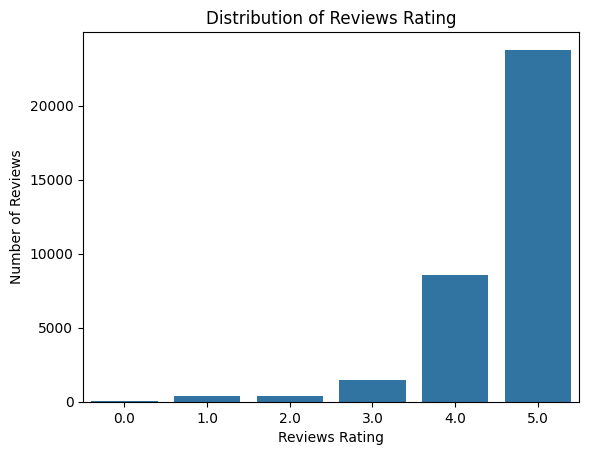

In [12]:
#visualizing the distribution of reviews.rating using a countplot:
sns.countplot(x = 'reviews.rating', data = customer_data)
plt.title('Distribution of Reviews Rating')
plt.xlabel('Reviews Rating')
plt.ylabel('Number of Reviews')
plt.show()

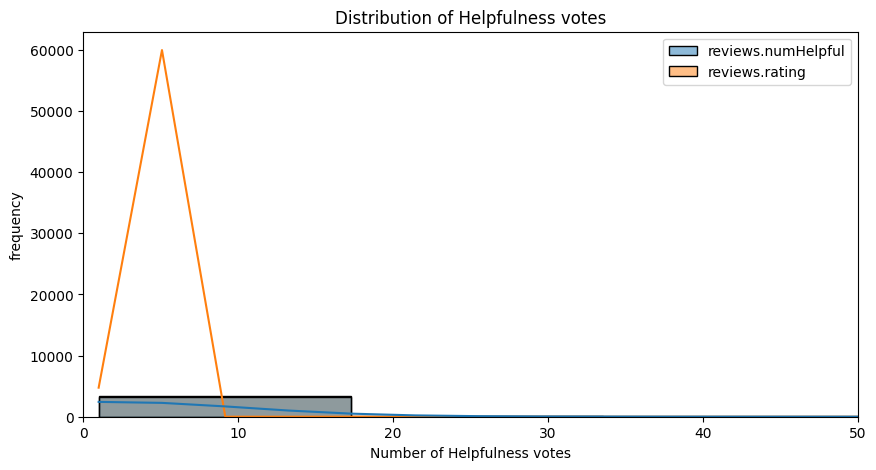

In [13]:
#visualizing reviews.numHelpful:
plt.figure(figsize = (10,5))
sns.histplot(customer_data[customer_data['reviews.numHelpful'] > 0], bins=50, kde=True )
plt.title('Distribution of Helpfulness votes')
plt.xlabel('Number of Helpfulness votes')
plt.ylabel('frequency')
plt.xlim(0,50)
plt.show()

In [14]:
customer_data['reviews.numHelpful'].value_counts()

,count
reviews.numHelpful,
0.0,31349
1.0,2049
2.0,562
3.0,190
4.0,122
...,...
195.0,1
744.0,1
384.0,1


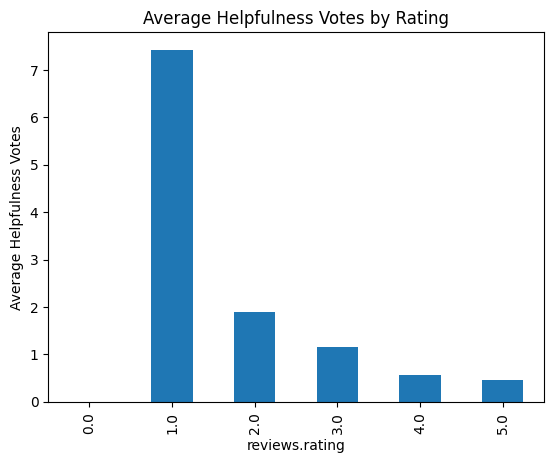

In [15]:
customer_data.groupby("reviews.rating")["reviews.numHelpful"].mean().plot(kind="bar")
plt.ylabel("Average Helpfulness Votes")
plt.title("Average Helpfulness Votes by Rating")
plt.show()


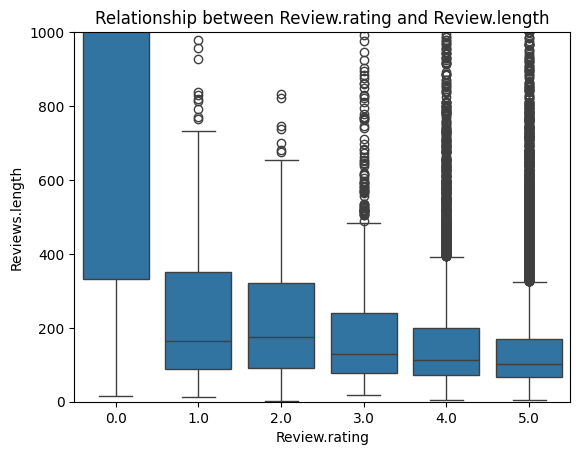

In [16]:
#Relationship between Review.rating and Review.length

#make a new column Review.length:
customer_data["reviews.length"] = customer_data["reviews.text"].astype("str").apply(len)

#plotting box plot:
sns.boxplot(x = 'reviews.rating', y = 'reviews.length', data= customer_data)
plt.title('Relationship between Review.rating and Review.length')
plt.xlabel('Review.rating')
plt.ylabel('Reviews.length')
plt.ylim(0,1000)
plt.show()

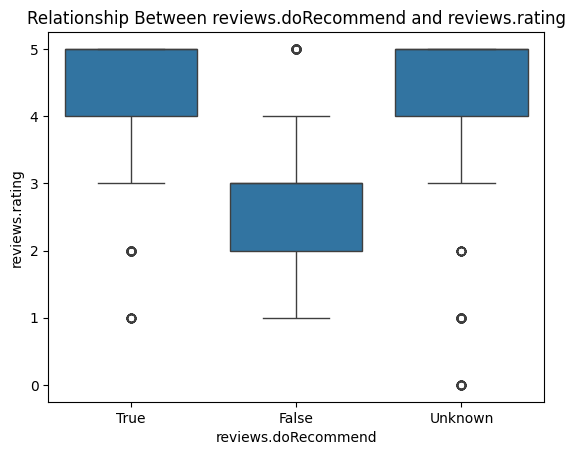

In [17]:
#Relationship Between reviews.doRecommend and reviews.rating:
sns.boxplot(x='reviews.doRecommend', y='reviews.rating', data=customer_data)
plt.title('Relationship Between reviews.doRecommend and reviews.rating')
plt.xlabel('reviews.doRecommend')
plt.ylabel('reviews.rating')
plt.show()


brand
Amazon Fire Tv                  4.707278
Amazon                          4.559632
Amazon Fire                     4.558594
Amazon Echo                     4.531447
Amazon Digital Services Inc.    3.500000
Amazon Coco T                   0.000000
Name: reviews.rating, dtype: float64


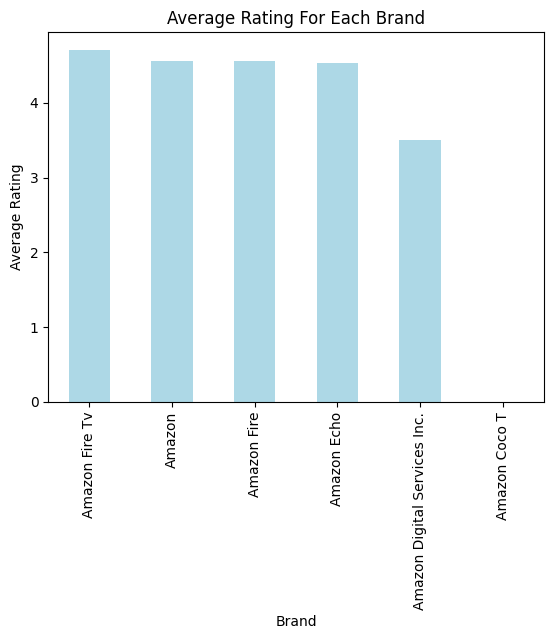

In [18]:
#calculate the average rating for each brand:
brand_ratings = customer_data.groupby('brand')['reviews.rating'].mean().sort_values(ascending = False)
print(brand_ratings)

#visualize top 10 brands:
top_10_brands = brand_ratings.head(10)

#plot:
top_10_brands.plot(kind='bar', color= 'lightblue')
plt.title('Average Rating For Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

brand
Amazon                          28701
Amazon Fire Tv                   5056
Amazon Echo                       636
Amazon Fire                       256
Amazon Digital Services Inc.       10
Amazon Coco T                       1
Name: count, dtype: int64


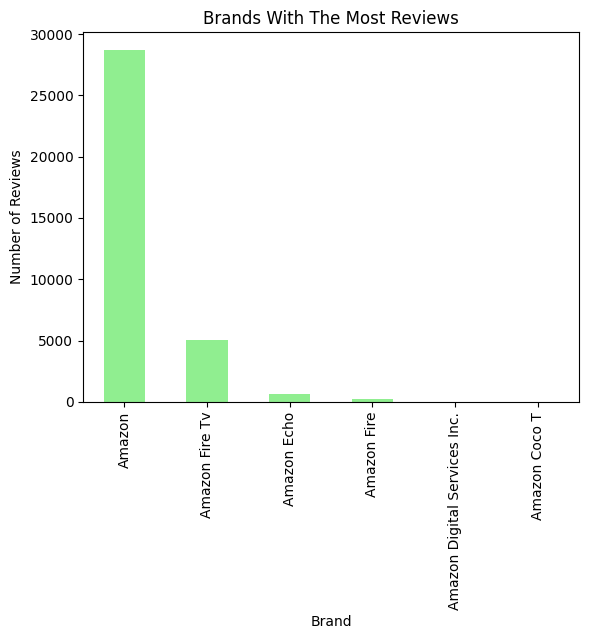

In [19]:
#brands with the most reviews
brand_reviews = customer_data['brand'].value_counts()
print(brand_reviews)

#plot:
brand_reviews.plot(kind='bar', color='lightgreen')
plt.title('Brands With The Most Reviews')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
#convert reviews.date into datetime:
customer_data['revies.date'] = pd.to_datetime(customer_data['reviews.date'])

In [21]:
#set reviews.date as index:
customer_data.set_index('reviews.date', inplace=True)

/tmp/ipython-input-22-3485534442.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = customer_data['reviews.rating'].resample('M').mean()


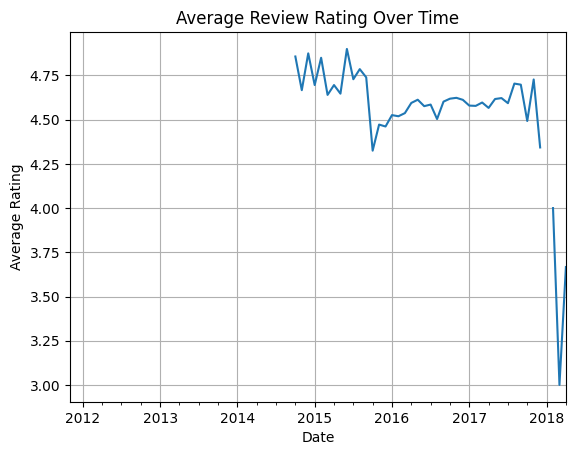

In [22]:
#resample by month and plot how the average review rating changed over time.
monthly_avg_rating = customer_data['reviews.rating'].resample('M').mean()
monthly_avg_rating.plot()
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [24]:
#Select useful columns and remove that are not needed fpr model:
customer_model_data = customer_data[['brand', 'manufacturer', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.numHelpful', 'reviews.doRecommend', 'reviews.dateAdded'
]]
print(customer_model_data)

                            brand                  manufacturer  \
reviews.date                                                      
2017-01-13 00:00:00+00:00  Amazon                        Amazon   
2017-01-13 00:00:00+00:00  Amazon                        Amazon   
2017-01-13 00:00:00+00:00  Amazon                        Amazon   
2017-01-13 00:00:00+00:00  Amazon                        Amazon   
2017-01-12 00:00:00+00:00  Amazon                        Amazon   
...                           ...                           ...   
NaT                        Amazon  Amazon Digital Services, Inc   
NaT                        Amazon  Amazon Digital Services, Inc   
NaT                        Amazon  Amazon Digital Services, Inc   
NaT                        Amazon  Amazon Digital Services, Inc   
NaT                        Amazon  Amazon Digital Services, Inc   

                           reviews.rating  \
reviews.date                                
2017-01-13 00:00:00+00:00             

In [25]:
#unique values in brand and manufacturer:
print(customer_model_data['brand'].unique())
print(customer_model_data['manufacturer'].unique())

['Amazon' 'Amazon Fire' 'Amazon Echo' 'Amazon Coco T' 'Amazon Fire Tv'
 'Amazon Digital Services Inc.']
['Amazon' 'Amazon Digital Services, Inc']


In [35]:
# Applying One-Hot Encoding to the 'brand' column since it has a small number of unique categories:
customer_data = pd.get_dummies(customer_model_data, columns =["brand"], prefix =['Brand'])
print(customer_data)

                           reviews.rating  \
reviews.date                                
2017-01-13 00:00:00+00:00             5.0   
2017-01-13 00:00:00+00:00             5.0   
2017-01-13 00:00:00+00:00             5.0   
2017-01-13 00:00:00+00:00             4.0   
2017-01-12 00:00:00+00:00             5.0   
...                                   ...   
NaT                                   3.0   
NaT                                   1.0   
NaT                                   1.0   
NaT                                   1.0   
NaT                                   1.0   

                                                                reviews.text  \
reviews.date                                                                   
2017-01-13 00:00:00+00:00  This product so far has not disappointed. My c...   
2017-01-13 00:00:00+00:00  great for beginner or experienced person. Boug...   
2017-01-13 00:00:00+00:00  Inexpensive tablet for him to use and learn on...   
2017-01-13 00: